In [1]:
%cd /content/drive/MyDrive/ERAv1/S9

/content/drive/MyDrive/ERAv1/S9


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -U git+https://github.com/albu/albumentations --no-cache-dir
! pip install torchsummary

In [2]:
import torchvision
from utils.utils import *
from pprint import pprint
import torch.optim as optim
from model.model import Net
from utils.test import test
from utils.train import train
from torch.optim.lr_scheduler import StepLR, OneCycleLR
from augment.augment import get_train_transform, get_test_transform

%matplotlib inline

# Dataset and Creating Train/Test Split

In [3]:
trainloader = get_loader(transform=None)
mean, std = get_stats(trainloader)
denorm = UnNormalize(mean, std)

Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: (50000, 32, 32, 3)
 - min: 0
 - max: 255

Dataset Mean - [0.49139968 0.48215841 0.44653091]
Dataset Std - [0.24703223 0.24348513 0.26158784] 


# Dataloader Arguments & Test/Train Dataloaders


In [4]:
train_transform = get_train_transform(mean, std)
test_transform = get_test_transform(mean, std)

trainloader = get_loader(transform=train_transform)
testloader = get_loader(transform=test_transform, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
device = get_device()
config = process_config("utils/config.yaml")
pprint(config)

CUDA Available? True
 Loading Configuration File
{'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck']},
 'model_params': {'dropout': 0.04,
                  'experiment_name': 'cifar10_image_classification',
                  'model_dir': './model/',
                  'seed': 42},
 'optimizer': {'args': {'lr': 0.01}, 'type': 'optim.Adam'},
 'training_params': {'epochs': 120}}


In [6]:
classes = config["data_loader"]["classes"]
batch_size = config["data_loader"]['args']["batch_size"]
num_workers = config["data_loader"]['args']["num_workers"]
dropout = config["model_params"]["dropout"]
seed = config["model_params"]["seed"]
epochs = config["training_params"]["epochs"]

  car truck  frog truck


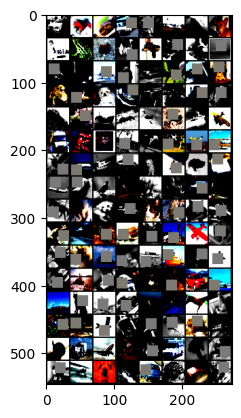

In [7]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# The model

In [8]:
model = Net().to(device)
get_summary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
       BatchNorm2d-2            [-1, 3, 32, 32]               6
              ReLU-3            [-1, 3, 32, 32]               0
            Conv2d-4           [-1, 32, 34, 34]              96
       BatchNorm2d-5           [-1, 32, 34, 34]              64
              ReLU-6           [-1, 32, 34, 34]               0
depthwise_separable_conv-7           [-1, 32, 34, 34]               0
            Conv2d-8           [-1, 32, 34, 34]             288
       BatchNorm2d-9           [-1, 32, 34, 34]              64
             ReLU-10           [-1, 32, 34, 34]               0
           Conv2d-11           [-1, 32, 36, 36]           1,024
      BatchNorm2d-12           [-1, 32, 36, 36]              64
             ReLU-13           [-1, 32, 36, 36]               0
depthwise_separable_conv-14      

# Training and Testing
Looking at logs can be boring, so we'll introduce tqdm progressbar to get cooler logs.

Let's write train and test functions

In [17]:
model = Net().to(device)

train_losses, train_acc = [], []
test_losses, test_acc = [], []

EPOCHS = 60

model =  Net().to(device)
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)

    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.8)
    scheduler = OneCycleLR(optimizer, max_lr=0.01, epochs=60, steps_per_epoch=len(trainloader), verbose=True)

    train(model, device, trainloader, optimizer, [test_losses, test_acc])
    scheduler.step()
    test(model, device, testloader, [train_losses, train_acc])

EPOCH: 0


Loss=2.097672700881958 Batch_id=390 Accuracy=14.12: 100%|██████████| 391/391 [00:23<00:00, 16.80it/s]



Test set: Average loss: 0.0156, Accuracy: 9646/50000 (19.29%)

EPOCH: 1


Loss=1.9233791828155518 Batch_id=390 Accuracy=22.53: 100%|██████████| 391/391 [00:17<00:00, 22.93it/s]



Test set: Average loss: 0.0137, Accuracy: 14141/50000 (28.28%)

EPOCH: 2


Loss=1.804343819618225 Batch_id=390 Accuracy=29.37: 100%|██████████| 391/391 [00:18<00:00, 21.30it/s]



Test set: Average loss: 0.0127, Accuracy: 18377/50000 (36.75%)

EPOCH: 3


Loss=1.741493582725525 Batch_id=390 Accuracy=36.07: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]



Test set: Average loss: 0.0113, Accuracy: 22896/50000 (45.79%)

EPOCH: 4


Loss=1.4670820236206055 Batch_id=390 Accuracy=40.66: 100%|██████████| 391/391 [00:15<00:00, 24.64it/s]



Test set: Average loss: 0.0104, Accuracy: 25264/50000 (50.53%)

EPOCH: 5


Loss=1.4546774625778198 Batch_id=390 Accuracy=44.77: 100%|██████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0096, Accuracy: 27706/50000 (55.41%)

EPOCH: 6


Loss=1.493087887763977 Batch_id=390 Accuracy=48.03: 100%|██████████| 391/391 [00:15<00:00, 24.64it/s]



Test set: Average loss: 0.0088, Accuracy: 29440/50000 (58.88%)

EPOCH: 7


Loss=1.358363151550293 Batch_id=390 Accuracy=50.71: 100%|██████████| 391/391 [00:17<00:00, 22.71it/s]



Test set: Average loss: 0.0080, Accuracy: 31559/50000 (63.12%)

EPOCH: 8


Loss=1.1404783725738525 Batch_id=390 Accuracy=52.33: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]



Test set: Average loss: 0.0079, Accuracy: 31690/50000 (63.38%)

EPOCH: 9


Loss=1.2345744371414185 Batch_id=390 Accuracy=53.55: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]



Test set: Average loss: 0.0073, Accuracy: 33141/50000 (66.28%)

EPOCH: 10


Loss=1.2751258611679077 Batch_id=390 Accuracy=54.93: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]



Test set: Average loss: 0.0071, Accuracy: 33882/50000 (67.76%)

EPOCH: 11


Loss=1.052389144897461 Batch_id=390 Accuracy=55.95: 100%|██████████| 391/391 [00:17<00:00, 22.99it/s]



Test set: Average loss: 0.0071, Accuracy: 33800/50000 (67.60%)

EPOCH: 12


Loss=1.0263621807098389 Batch_id=390 Accuracy=56.76: 100%|██████████| 391/391 [00:16<00:00, 23.88it/s]



Test set: Average loss: 0.0067, Accuracy: 34623/50000 (69.25%)

EPOCH: 13


Loss=1.1535707712173462 Batch_id=390 Accuracy=57.78: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.0063, Accuracy: 35683/50000 (71.37%)

EPOCH: 14


Loss=1.2040852308273315 Batch_id=390 Accuracy=58.86: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.0064, Accuracy: 35387/50000 (70.77%)

EPOCH: 15


Loss=1.1471121311187744 Batch_id=390 Accuracy=59.63: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]



Test set: Average loss: 0.0060, Accuracy: 36395/50000 (72.79%)

EPOCH: 16


Loss=1.2534881830215454 Batch_id=390 Accuracy=60.53: 100%|██████████| 391/391 [00:18<00:00, 21.37it/s]



Test set: Average loss: 0.0059, Accuracy: 36818/50000 (73.64%)

EPOCH: 17


Loss=1.1276224851608276 Batch_id=390 Accuracy=60.93: 100%|██████████| 391/391 [00:17<00:00, 21.84it/s]



Test set: Average loss: 0.0057, Accuracy: 37025/50000 (74.05%)

EPOCH: 18


Loss=1.1794894933700562 Batch_id=390 Accuracy=61.87: 100%|██████████| 391/391 [00:17<00:00, 22.42it/s]



Test set: Average loss: 0.0057, Accuracy: 37334/50000 (74.67%)

EPOCH: 19


Loss=1.1279816627502441 Batch_id=390 Accuracy=62.24: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]



Test set: Average loss: 0.0055, Accuracy: 37707/50000 (75.41%)

EPOCH: 20


Loss=1.1474653482437134 Batch_id=390 Accuracy=63.01: 100%|██████████| 391/391 [00:16<00:00, 23.48it/s]



Test set: Average loss: 0.0054, Accuracy: 37814/50000 (75.63%)

EPOCH: 21


Loss=1.1049258708953857 Batch_id=390 Accuracy=63.27: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]



Test set: Average loss: 0.0052, Accuracy: 38316/50000 (76.63%)

EPOCH: 22


Loss=1.107634425163269 Batch_id=390 Accuracy=63.40: 100%|██████████| 391/391 [00:17<00:00, 22.81it/s]



Test set: Average loss: 0.0051, Accuracy: 38694/50000 (77.39%)

EPOCH: 23


Loss=1.0228604078292847 Batch_id=390 Accuracy=64.23: 100%|██████████| 391/391 [00:17<00:00, 22.52it/s]



Test set: Average loss: 0.0049, Accuracy: 38859/50000 (77.72%)

EPOCH: 24


Loss=0.9359288215637207 Batch_id=390 Accuracy=64.38: 100%|██████████| 391/391 [00:17<00:00, 22.68it/s]



Test set: Average loss: 0.0049, Accuracy: 39027/50000 (78.05%)

EPOCH: 25


Loss=1.1534053087234497 Batch_id=390 Accuracy=64.90: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]



Test set: Average loss: 0.0048, Accuracy: 39392/50000 (78.78%)

EPOCH: 26


Loss=1.129422664642334 Batch_id=390 Accuracy=64.92: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]



Test set: Average loss: 0.0048, Accuracy: 39512/50000 (79.02%)

EPOCH: 27


Loss=0.9655517339706421 Batch_id=390 Accuracy=64.99: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]



Test set: Average loss: 0.0047, Accuracy: 39704/50000 (79.41%)

EPOCH: 28


Loss=0.9407041668891907 Batch_id=390 Accuracy=65.38: 100%|██████████| 391/391 [00:16<00:00, 23.05it/s]



Test set: Average loss: 0.0047, Accuracy: 39696/50000 (79.39%)

EPOCH: 29


Loss=0.8775504231452942 Batch_id=390 Accuracy=66.13: 100%|██████████| 391/391 [00:17<00:00, 22.74it/s]



Test set: Average loss: 0.0045, Accuracy: 39950/50000 (79.90%)

EPOCH: 30


Loss=1.01112961769104 Batch_id=390 Accuracy=66.30: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]



Test set: Average loss: 0.0045, Accuracy: 39939/50000 (79.88%)

EPOCH: 31


Loss=0.8513558506965637 Batch_id=390 Accuracy=66.22: 100%|██████████| 391/391 [00:17<00:00, 22.94it/s]



Test set: Average loss: 0.0045, Accuracy: 40087/50000 (80.17%)

EPOCH: 32


Loss=1.2039210796356201 Batch_id=390 Accuracy=66.64: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 0.0043, Accuracy: 40545/50000 (81.09%)

EPOCH: 33


Loss=0.8116130828857422 Batch_id=390 Accuracy=66.67: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]



Test set: Average loss: 0.0043, Accuracy: 40552/50000 (81.10%)

EPOCH: 34


Loss=0.7978744506835938 Batch_id=390 Accuracy=67.06: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s]



Test set: Average loss: 0.0042, Accuracy: 40760/50000 (81.52%)

EPOCH: 35


Loss=0.747665286064148 Batch_id=390 Accuracy=67.39: 100%|██████████| 391/391 [00:17<00:00, 22.26it/s]



Test set: Average loss: 0.0041, Accuracy: 40914/50000 (81.83%)

EPOCH: 36


Loss=1.0176655054092407 Batch_id=390 Accuracy=67.57: 100%|██████████| 391/391 [00:16<00:00, 23.14it/s]



Test set: Average loss: 0.0041, Accuracy: 40971/50000 (81.94%)

EPOCH: 37


Loss=1.055802583694458 Batch_id=390 Accuracy=67.66: 100%|██████████| 391/391 [00:16<00:00, 23.24it/s]



Test set: Average loss: 0.0040, Accuracy: 41126/50000 (82.25%)

EPOCH: 38


Loss=0.7940801978111267 Batch_id=390 Accuracy=67.71: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]



Test set: Average loss: 0.0040, Accuracy: 41099/50000 (82.20%)

EPOCH: 39


Loss=0.9978891611099243 Batch_id=390 Accuracy=68.11: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]



Test set: Average loss: 0.0040, Accuracy: 41103/50000 (82.21%)

EPOCH: 40


Loss=0.776904284954071 Batch_id=390 Accuracy=68.40: 100%|██████████| 391/391 [00:16<00:00, 23.18it/s]



Test set: Average loss: 0.0039, Accuracy: 41263/50000 (82.53%)

EPOCH: 41


Loss=0.9935503005981445 Batch_id=390 Accuracy=68.46: 100%|██████████| 391/391 [00:16<00:00, 23.49it/s]



Test set: Average loss: 0.0038, Accuracy: 41470/50000 (82.94%)

EPOCH: 42


Loss=1.0259487628936768 Batch_id=390 Accuracy=68.67: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]



Test set: Average loss: 0.0038, Accuracy: 41539/50000 (83.08%)

EPOCH: 43


Loss=0.9181448221206665 Batch_id=390 Accuracy=68.90: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]



Test set: Average loss: 0.0038, Accuracy: 41464/50000 (82.93%)

EPOCH: 44


Loss=0.855462908744812 Batch_id=390 Accuracy=68.97: 100%|██████████| 391/391 [00:17<00:00, 22.45it/s]



Test set: Average loss: 0.0039, Accuracy: 41294/50000 (82.59%)

EPOCH: 45


Loss=0.810455322265625 Batch_id=390 Accuracy=69.11: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]



Test set: Average loss: 0.0038, Accuracy: 41617/50000 (83.23%)

EPOCH: 46


Loss=0.8999330401420593 Batch_id=390 Accuracy=69.36: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]



Test set: Average loss: 0.0037, Accuracy: 41667/50000 (83.33%)

EPOCH: 47


Loss=0.9379239082336426 Batch_id=390 Accuracy=69.53: 100%|██████████| 391/391 [00:17<00:00, 22.88it/s]



Test set: Average loss: 0.0038, Accuracy: 41596/50000 (83.19%)

EPOCH: 48


Loss=0.8045741319656372 Batch_id=390 Accuracy=69.37: 100%|██████████| 391/391 [00:17<00:00, 22.76it/s]



Test set: Average loss: 0.0035, Accuracy: 42237/50000 (84.47%)

EPOCH: 49


Loss=1.105459451675415 Batch_id=390 Accuracy=69.73: 100%|██████████| 391/391 [00:18<00:00, 21.06it/s]



Test set: Average loss: 0.0036, Accuracy: 42024/50000 (84.05%)

EPOCH: 50


Loss=1.045619249343872 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]



Test set: Average loss: 0.0035, Accuracy: 42157/50000 (84.31%)

EPOCH: 51


Loss=0.7845791578292847 Batch_id=390 Accuracy=70.04: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]



Test set: Average loss: 0.0036, Accuracy: 42140/50000 (84.28%)

EPOCH: 52


Loss=0.7668627500534058 Batch_id=390 Accuracy=69.71: 100%|██████████| 391/391 [00:17<00:00, 21.86it/s]



Test set: Average loss: 0.0035, Accuracy: 42172/50000 (84.34%)

EPOCH: 53


Loss=0.8231522440910339 Batch_id=390 Accuracy=70.09: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]



Test set: Average loss: 0.0035, Accuracy: 42265/50000 (84.53%)

EPOCH: 54


Loss=0.9210013151168823 Batch_id=390 Accuracy=70.14: 100%|██████████| 391/391 [00:17<00:00, 22.31it/s]



Test set: Average loss: 0.0035, Accuracy: 42214/50000 (84.43%)

EPOCH: 55


Loss=0.849112868309021 Batch_id=390 Accuracy=70.37: 100%|██████████| 391/391 [00:16<00:00, 23.07it/s]



Test set: Average loss: 0.0034, Accuracy: 42518/50000 (85.04%)

EPOCH: 56


Loss=0.8284203410148621 Batch_id=390 Accuracy=70.41: 100%|██████████| 391/391 [00:16<00:00, 23.17it/s]



Test set: Average loss: 0.0034, Accuracy: 42562/50000 (85.12%)

EPOCH: 57


Loss=0.9443527460098267 Batch_id=390 Accuracy=70.70: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]



Test set: Average loss: 0.0034, Accuracy: 42584/50000 (85.17%)

EPOCH: 58


Loss=0.9478194117546082 Batch_id=390 Accuracy=70.83: 100%|██████████| 391/391 [00:17<00:00, 22.75it/s]



Test set: Average loss: 0.0033, Accuracy: 42846/50000 (85.69%)

EPOCH: 59


Loss=0.8695204854011536 Batch_id=390 Accuracy=71.19: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]



Test set: Average loss: 0.0033, Accuracy: 42671/50000 (85.34%)

EPOCH: 60


Loss=1.072361707687378 Batch_id=390 Accuracy=70.61: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]



Test set: Average loss: 0.0033, Accuracy: 42785/50000 (85.57%)

EPOCH: 61


Loss=0.9026285409927368 Batch_id=390 Accuracy=70.93: 100%|██████████| 391/391 [00:17<00:00, 21.93it/s]



Test set: Average loss: 0.0033, Accuracy: 42647/50000 (85.29%)

EPOCH: 62


Loss=0.6257885694503784 Batch_id=390 Accuracy=71.12: 100%|██████████| 391/391 [00:18<00:00, 21.33it/s]



Test set: Average loss: 0.0033, Accuracy: 42754/50000 (85.51%)

EPOCH: 63


Loss=0.7716007232666016 Batch_id=390 Accuracy=71.16: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]



Test set: Average loss: 0.0032, Accuracy: 42945/50000 (85.89%)

EPOCH: 64


Loss=0.7918602228164673 Batch_id=390 Accuracy=71.48: 100%|██████████| 391/391 [00:16<00:00, 23.10it/s]



Test set: Average loss: 0.0032, Accuracy: 42949/50000 (85.90%)

EPOCH: 65


Loss=0.7250040173530579 Batch_id=390 Accuracy=71.32: 100%|██████████| 391/391 [00:17<00:00, 22.87it/s]



Test set: Average loss: 0.0032, Accuracy: 43072/50000 (86.14%)

EPOCH: 66


Loss=0.6880723237991333 Batch_id=390 Accuracy=71.48: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s]



Test set: Average loss: 0.0031, Accuracy: 43107/50000 (86.21%)

EPOCH: 67


Loss=0.7238771915435791 Batch_id=390 Accuracy=71.78: 100%|██████████| 391/391 [00:17<00:00, 22.61it/s]



Test set: Average loss: 0.0030, Accuracy: 43359/50000 (86.72%)

EPOCH: 68


Loss=0.5147561430931091 Batch_id=390 Accuracy=71.41: 100%|██████████| 391/391 [00:17<00:00, 22.68it/s]



Test set: Average loss: 0.0031, Accuracy: 43377/50000 (86.75%)

EPOCH: 69


Loss=0.8722718954086304 Batch_id=390 Accuracy=71.80: 100%|██████████| 391/391 [00:18<00:00, 20.69it/s]



Test set: Average loss: 0.0031, Accuracy: 43299/50000 (86.60%)

EPOCH: 70


Loss=0.765256941318512 Batch_id=390 Accuracy=71.52: 100%|██████████| 391/391 [00:17<00:00, 22.06it/s]



Test set: Average loss: 0.0030, Accuracy: 43411/50000 (86.82%)

EPOCH: 71


Loss=0.7650793194770813 Batch_id=390 Accuracy=71.96: 100%|██████████| 391/391 [00:18<00:00, 21.51it/s]



Test set: Average loss: 0.0031, Accuracy: 43268/50000 (86.54%)

EPOCH: 72


Loss=0.7608504295349121 Batch_id=390 Accuracy=72.18: 100%|██████████| 391/391 [00:18<00:00, 21.65it/s]



Test set: Average loss: 0.0031, Accuracy: 43196/50000 (86.39%)

EPOCH: 73


Loss=0.7548934817314148 Batch_id=390 Accuracy=72.09: 100%|██████████| 391/391 [00:17<00:00, 22.31it/s]



Test set: Average loss: 0.0030, Accuracy: 43519/50000 (87.04%)

EPOCH: 74


Loss=0.7066032290458679 Batch_id=390 Accuracy=72.22: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]



Test set: Average loss: 0.0030, Accuracy: 43342/50000 (86.68%)

EPOCH: 75


Loss=0.878619372844696 Batch_id=390 Accuracy=72.33: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]



Test set: Average loss: 0.0029, Accuracy: 43593/50000 (87.19%)

EPOCH: 76


Loss=0.6697802543640137 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]



Test set: Average loss: 0.0030, Accuracy: 43433/50000 (86.87%)

EPOCH: 77


Loss=0.8300576210021973 Batch_id=390 Accuracy=72.42: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]



Test set: Average loss: 0.0029, Accuracy: 43635/50000 (87.27%)

EPOCH: 78


Loss=0.7973286509513855 Batch_id=390 Accuracy=72.47: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]



Test set: Average loss: 0.0029, Accuracy: 43510/50000 (87.02%)

EPOCH: 79


Loss=0.7327312231063843 Batch_id=390 Accuracy=72.77: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.0029, Accuracy: 43749/50000 (87.50%)

EPOCH: 80


Loss=0.6905401945114136 Batch_id=390 Accuracy=72.71: 100%|██████████| 391/391 [00:17<00:00, 21.73it/s]



Test set: Average loss: 0.0029, Accuracy: 43682/50000 (87.36%)

EPOCH: 81


Loss=0.9952092170715332 Batch_id=390 Accuracy=72.74: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]



Test set: Average loss: 0.0028, Accuracy: 43796/50000 (87.59%)

EPOCH: 82


Loss=0.8214624524116516 Batch_id=390 Accuracy=73.03: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Test set: Average loss: 0.0028, Accuracy: 43772/50000 (87.54%)

EPOCH: 83


Loss=0.9756428599357605 Batch_id=390 Accuracy=72.54: 100%|██████████| 391/391 [00:17<00:00, 22.61it/s]



Test set: Average loss: 0.0028, Accuracy: 44021/50000 (88.04%)

EPOCH: 84


Loss=0.7257782220840454 Batch_id=390 Accuracy=73.09: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]



Test set: Average loss: 0.0028, Accuracy: 43830/50000 (87.66%)

EPOCH: 85


Loss=0.7141084671020508 Batch_id=390 Accuracy=73.05: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]



Test set: Average loss: 0.0028, Accuracy: 43880/50000 (87.76%)

EPOCH: 86


Loss=0.6093583106994629 Batch_id=390 Accuracy=73.24: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]



Test set: Average loss: 0.0028, Accuracy: 44105/50000 (88.21%)

EPOCH: 87


Loss=0.8504127264022827 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]



Test set: Average loss: 0.0027, Accuracy: 44151/50000 (88.30%)

EPOCH: 88


Loss=0.8511843681335449 Batch_id=390 Accuracy=73.36: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]



Test set: Average loss: 0.0027, Accuracy: 44115/50000 (88.23%)

EPOCH: 89


Loss=0.8677444458007812 Batch_id=390 Accuracy=73.18: 100%|██████████| 391/391 [00:17<00:00, 22.28it/s]



Test set: Average loss: 0.0028, Accuracy: 43963/50000 (87.93%)

EPOCH: 90


Loss=0.8394671678543091 Batch_id=390 Accuracy=73.42: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]



Test set: Average loss: 0.0027, Accuracy: 44180/50000 (88.36%)

EPOCH: 91


Loss=0.8302603960037231 Batch_id=390 Accuracy=73.31: 100%|██████████| 391/391 [00:17<00:00, 22.48it/s]



Test set: Average loss: 0.0027, Accuracy: 44081/50000 (88.16%)

EPOCH: 92


Loss=0.7618218660354614 Batch_id=390 Accuracy=73.28: 100%|██████████| 391/391 [00:17<00:00, 21.83it/s]



Test set: Average loss: 0.0026, Accuracy: 44194/50000 (88.39%)

EPOCH: 93


Loss=0.7848831415176392 Batch_id=390 Accuracy=73.76: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]



Test set: Average loss: 0.0026, Accuracy: 44234/50000 (88.47%)

EPOCH: 94


Loss=0.6605666875839233 Batch_id=390 Accuracy=73.60: 100%|██████████| 391/391 [00:18<00:00, 21.24it/s]



Test set: Average loss: 0.0026, Accuracy: 44333/50000 (88.67%)

EPOCH: 95


Loss=0.8495286107063293 Batch_id=390 Accuracy=73.57: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Test set: Average loss: 0.0026, Accuracy: 44293/50000 (88.59%)

EPOCH: 96


Loss=0.8369728326797485 Batch_id=390 Accuracy=73.46: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]



Test set: Average loss: 0.0026, Accuracy: 44180/50000 (88.36%)

EPOCH: 97


Loss=0.6901125907897949 Batch_id=390 Accuracy=73.90: 100%|██████████| 391/391 [00:17<00:00, 22.20it/s]



Test set: Average loss: 0.0026, Accuracy: 44350/50000 (88.70%)

EPOCH: 98


Loss=0.909676194190979 Batch_id=390 Accuracy=73.50: 100%|██████████| 391/391 [00:17<00:00, 22.31it/s]



Test set: Average loss: 0.0026, Accuracy: 44185/50000 (88.37%)

EPOCH: 99


Loss=0.6804737448692322 Batch_id=390 Accuracy=73.68: 100%|██████████| 391/391 [00:18<00:00, 21.51it/s]



Test set: Average loss: 0.0026, Accuracy: 44278/50000 (88.56%)

EPOCH: 100


Loss=0.7251627445220947 Batch_id=390 Accuracy=73.90: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.0026, Accuracy: 44270/50000 (88.54%)

EPOCH: 101


Loss=0.9692034721374512 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]



Test set: Average loss: 0.0026, Accuracy: 44275/50000 (88.55%)

EPOCH: 102


Loss=0.9897476434707642 Batch_id=390 Accuracy=73.99: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]



Test set: Average loss: 0.0026, Accuracy: 44323/50000 (88.65%)

EPOCH: 103


Loss=0.8273954391479492 Batch_id=390 Accuracy=74.35: 100%|██████████| 391/391 [00:17<00:00, 21.82it/s]



Test set: Average loss: 0.0025, Accuracy: 44625/50000 (89.25%)

EPOCH: 104


Loss=0.6636887788772583 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:18<00:00, 21.68it/s]



Test set: Average loss: 0.0025, Accuracy: 44416/50000 (88.83%)

EPOCH: 105


Loss=0.7438744306564331 Batch_id=390 Accuracy=73.97: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]



Test set: Average loss: 0.0026, Accuracy: 44231/50000 (88.46%)

EPOCH: 106


Loss=0.7947908043861389 Batch_id=390 Accuracy=74.36: 100%|██████████| 391/391 [00:18<00:00, 21.20it/s]



Test set: Average loss: 0.0025, Accuracy: 44476/50000 (88.95%)

EPOCH: 107


Loss=1.1040806770324707 Batch_id=390 Accuracy=74.18: 100%|██████████| 391/391 [00:18<00:00, 21.23it/s]



Test set: Average loss: 0.0025, Accuracy: 44576/50000 (89.15%)

EPOCH: 108


Loss=0.7500588297843933 Batch_id=390 Accuracy=74.20: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Test set: Average loss: 0.0025, Accuracy: 44630/50000 (89.26%)

EPOCH: 109


Loss=0.5711361765861511 Batch_id=390 Accuracy=74.09: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 0.0025, Accuracy: 44500/50000 (89.00%)

EPOCH: 110


Loss=0.7463518381118774 Batch_id=390 Accuracy=74.26: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]



Test set: Average loss: 0.0025, Accuracy: 44580/50000 (89.16%)

EPOCH: 111


Loss=0.8058812022209167 Batch_id=390 Accuracy=74.26: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]



Test set: Average loss: 0.0025, Accuracy: 44566/50000 (89.13%)

EPOCH: 112


Loss=0.792466938495636 Batch_id=390 Accuracy=74.61: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Test set: Average loss: 0.0025, Accuracy: 44519/50000 (89.04%)

EPOCH: 113


Loss=0.8315362930297852 Batch_id=390 Accuracy=74.39: 100%|██████████| 391/391 [00:18<00:00, 21.17it/s]



Test set: Average loss: 0.0024, Accuracy: 44771/50000 (89.54%)

EPOCH: 114


Loss=0.5563838481903076 Batch_id=390 Accuracy=74.53: 100%|██████████| 391/391 [00:19<00:00, 20.25it/s]



Test set: Average loss: 0.0024, Accuracy: 44700/50000 (89.40%)

EPOCH: 115


Loss=0.8384313583374023 Batch_id=390 Accuracy=74.44: 100%|██████████| 391/391 [00:17<00:00, 21.94it/s]



Test set: Average loss: 0.0024, Accuracy: 44678/50000 (89.36%)

EPOCH: 116


Loss=0.7967886924743652 Batch_id=390 Accuracy=74.83: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]



Test set: Average loss: 0.0024, Accuracy: 44688/50000 (89.38%)

EPOCH: 117


Loss=0.8462435007095337 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:18<00:00, 21.38it/s]



Test set: Average loss: 0.0023, Accuracy: 44959/50000 (89.92%)

EPOCH: 118


Loss=0.5553691387176514 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]



Test set: Average loss: 0.0023, Accuracy: 44880/50000 (89.76%)

EPOCH: 119


Loss=0.8531054258346558 Batch_id=390 Accuracy=74.81: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]



Test set: Average loss: 0.0024, Accuracy: 44834/50000 (89.67%)

EPOCH: 120


Loss=0.467678964138031 Batch_id=390 Accuracy=74.64: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]



Test set: Average loss: 0.0023, Accuracy: 44865/50000 (89.73%)

EPOCH: 121


Loss=0.7026703953742981 Batch_id=390 Accuracy=74.89: 100%|██████████| 391/391 [00:18<00:00, 21.40it/s]



Test set: Average loss: 0.0024, Accuracy: 44732/50000 (89.46%)

EPOCH: 122


Loss=0.7264532446861267 Batch_id=390 Accuracy=74.82: 100%|██████████| 391/391 [00:17<00:00, 22.24it/s]



Test set: Average loss: 0.0023, Accuracy: 44863/50000 (89.73%)

EPOCH: 123


Loss=0.6173915863037109 Batch_id=390 Accuracy=74.66: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]



Test set: Average loss: 0.0024, Accuracy: 44853/50000 (89.71%)

EPOCH: 124


Loss=0.5354357957839966 Batch_id=390 Accuracy=74.89: 100%|██████████| 391/391 [00:17<00:00, 22.89it/s]



Test set: Average loss: 0.0024, Accuracy: 44813/50000 (89.63%)

EPOCH: 125


Loss=0.9273862838745117 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:16<00:00, 23.50it/s]



Test set: Average loss: 0.0023, Accuracy: 44927/50000 (89.85%)

EPOCH: 126


Loss=0.7286441326141357 Batch_id=390 Accuracy=74.93: 100%|██████████| 391/391 [00:17<00:00, 22.34it/s]



Test set: Average loss: 0.0023, Accuracy: 45027/50000 (90.05%)

EPOCH: 127


Loss=0.6584928035736084 Batch_id=390 Accuracy=75.04: 100%|██████████| 391/391 [00:18<00:00, 21.61it/s]



Test set: Average loss: 0.0023, Accuracy: 45046/50000 (90.09%)

EPOCH: 128


Loss=0.8651180267333984 Batch_id=390 Accuracy=75.20: 100%|██████████| 391/391 [00:18<00:00, 21.53it/s]



Test set: Average loss: 0.0023, Accuracy: 44894/50000 (89.79%)

EPOCH: 129


Loss=0.6431292295455933 Batch_id=390 Accuracy=74.84: 100%|██████████| 391/391 [00:18<00:00, 21.72it/s]



Test set: Average loss: 0.0023, Accuracy: 45024/50000 (90.05%)

EPOCH: 130


Loss=0.7513049840927124 Batch_id=390 Accuracy=74.88: 100%|██████████| 391/391 [00:17<00:00, 21.90it/s]



Test set: Average loss: 0.0023, Accuracy: 44957/50000 (89.91%)

EPOCH: 131


Loss=0.7328546643257141 Batch_id=390 Accuracy=75.07: 100%|██████████| 391/391 [00:17<00:00, 22.55it/s]



Test set: Average loss: 0.0022, Accuracy: 45093/50000 (90.19%)

EPOCH: 132


Loss=0.860740065574646 Batch_id=390 Accuracy=75.09: 100%|██████████| 391/391 [00:17<00:00, 22.03it/s]



Test set: Average loss: 0.0022, Accuracy: 45122/50000 (90.24%)

EPOCH: 133


Loss=0.47447124123573303 Batch_id=390 Accuracy=75.23: 100%|██████████| 391/391 [00:17<00:00, 22.37it/s]



Test set: Average loss: 0.0022, Accuracy: 45160/50000 (90.32%)

EPOCH: 134


Loss=0.5719941854476929 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [00:17<00:00, 22.57it/s]



Test set: Average loss: 0.0022, Accuracy: 45107/50000 (90.21%)

EPOCH: 135


Loss=0.8542083501815796 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]



Test set: Average loss: 0.0023, Accuracy: 45061/50000 (90.12%)

EPOCH: 136


Loss=0.813823401927948 Batch_id=390 Accuracy=75.59: 100%|██████████| 391/391 [00:16<00:00, 23.79it/s]



Test set: Average loss: 0.0023, Accuracy: 44875/50000 (89.75%)

EPOCH: 137


Loss=0.6082226634025574 Batch_id=390 Accuracy=75.24: 100%|██████████| 391/391 [00:16<00:00, 24.04it/s]



Test set: Average loss: 0.0022, Accuracy: 45168/50000 (90.34%)

EPOCH: 138


Loss=0.6364578008651733 Batch_id=390 Accuracy=75.22: 100%|██████████| 391/391 [00:16<00:00, 23.89it/s]



Test set: Average loss: 0.0022, Accuracy: 45149/50000 (90.30%)

EPOCH: 139


Loss=0.760826826095581 Batch_id=390 Accuracy=75.27: 100%|██████████| 391/391 [00:16<00:00, 24.14it/s]



Test set: Average loss: 0.0022, Accuracy: 45268/50000 (90.54%)

EPOCH: 140


Loss=0.9328159093856812 Batch_id=390 Accuracy=75.40: 100%|██████████| 391/391 [00:17<00:00, 22.37it/s]



Test set: Average loss: 0.0021, Accuracy: 45374/50000 (90.75%)

EPOCH: 141


Loss=0.8959890604019165 Batch_id=390 Accuracy=75.60: 100%|██████████| 391/391 [00:16<00:00, 24.00it/s]



Test set: Average loss: 0.0021, Accuracy: 45316/50000 (90.63%)

EPOCH: 142


Loss=0.8380904197692871 Batch_id=390 Accuracy=75.53: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]



Test set: Average loss: 0.0022, Accuracy: 45239/50000 (90.48%)

EPOCH: 143


Loss=0.697749674320221 Batch_id=390 Accuracy=75.41: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]



Test set: Average loss: 0.0022, Accuracy: 45227/50000 (90.45%)

EPOCH: 144


Loss=0.6556462645530701 Batch_id=390 Accuracy=75.54: 100%|██████████| 391/391 [00:16<00:00, 23.09it/s]



Test set: Average loss: 0.0022, Accuracy: 45207/50000 (90.41%)

EPOCH: 145


Loss=0.6064516305923462 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:16<00:00, 24.07it/s]



Test set: Average loss: 0.0021, Accuracy: 45415/50000 (90.83%)

EPOCH: 146


Loss=0.5199799537658691 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:16<00:00, 24.26it/s]



Test set: Average loss: 0.0021, Accuracy: 45479/50000 (90.96%)

EPOCH: 147


Loss=0.8432174921035767 Batch_id=390 Accuracy=75.59: 100%|██████████| 391/391 [00:16<00:00, 24.26it/s]



Test set: Average loss: 0.0021, Accuracy: 45313/50000 (90.63%)

EPOCH: 148


Loss=0.6849509477615356 Batch_id=390 Accuracy=75.93: 100%|██████████| 391/391 [00:16<00:00, 24.25it/s]



Test set: Average loss: 0.0021, Accuracy: 45385/50000 (90.77%)

EPOCH: 149


Loss=0.9483348727226257 Batch_id=390 Accuracy=75.78: 100%|██████████| 391/391 [00:16<00:00, 24.08it/s]



Test set: Average loss: 0.0021, Accuracy: 45449/50000 (90.90%)

EPOCH: 150


Loss=0.7243442535400391 Batch_id=390 Accuracy=75.59: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]



Test set: Average loss: 0.0021, Accuracy: 45453/50000 (90.91%)

EPOCH: 151


Loss=0.8099309206008911 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:16<00:00, 23.62it/s]



Test set: Average loss: 0.0022, Accuracy: 45196/50000 (90.39%)

EPOCH: 152


Loss=0.7778090834617615 Batch_id=390 Accuracy=75.92: 100%|██████████| 391/391 [00:16<00:00, 24.26it/s]



Test set: Average loss: 0.0021, Accuracy: 45422/50000 (90.84%)

EPOCH: 153


Loss=0.583936333656311 Batch_id=390 Accuracy=75.78: 100%|██████████| 391/391 [00:16<00:00, 24.11it/s]



Test set: Average loss: 0.0021, Accuracy: 45342/50000 (90.68%)

EPOCH: 154


Loss=0.7747195959091187 Batch_id=390 Accuracy=76.15: 100%|██████████| 391/391 [00:16<00:00, 24.39it/s]



Test set: Average loss: 0.0021, Accuracy: 45532/50000 (91.06%)

EPOCH: 155


Loss=0.7131379842758179 Batch_id=390 Accuracy=75.96: 100%|██████████| 391/391 [00:15<00:00, 24.48it/s]



Test set: Average loss: 0.0021, Accuracy: 45522/50000 (91.04%)

EPOCH: 156


Loss=0.8241327404975891 Batch_id=390 Accuracy=75.88: 100%|██████████| 391/391 [00:17<00:00, 22.81it/s]



Test set: Average loss: 0.0021, Accuracy: 45421/50000 (90.84%)

EPOCH: 157


Loss=0.7193752527236938 Batch_id=390 Accuracy=75.59: 100%|██████████| 391/391 [00:16<00:00, 23.47it/s]



Test set: Average loss: 0.0020, Accuracy: 45616/50000 (91.23%)

EPOCH: 158


Loss=0.887294590473175 Batch_id=390 Accuracy=76.03: 100%|██████████| 391/391 [00:16<00:00, 23.34it/s]



Test set: Average loss: 0.0021, Accuracy: 45636/50000 (91.27%)

EPOCH: 159


Loss=0.6032622456550598 Batch_id=390 Accuracy=75.86: 100%|██████████| 391/391 [00:16<00:00, 24.05it/s]



Test set: Average loss: 0.0020, Accuracy: 45552/50000 (91.10%)

EPOCH: 160


Loss=0.538081705570221 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:16<00:00, 24.13it/s]



Test set: Average loss: 0.0020, Accuracy: 45623/50000 (91.25%)

EPOCH: 161


Loss=0.6953930854797363 Batch_id=390 Accuracy=75.84: 100%|██████████| 391/391 [00:16<00:00, 23.97it/s]



Test set: Average loss: 0.0020, Accuracy: 45628/50000 (91.26%)

EPOCH: 162


Loss=0.5785141587257385 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [00:16<00:00, 24.42it/s]



Test set: Average loss: 0.0020, Accuracy: 45573/50000 (91.15%)

EPOCH: 163


Loss=0.6472465395927429 Batch_id=390 Accuracy=76.19: 100%|██████████| 391/391 [00:16<00:00, 23.04it/s]



Test set: Average loss: 0.0020, Accuracy: 45706/50000 (91.41%)

EPOCH: 164


Loss=0.6924925446510315 Batch_id=390 Accuracy=76.16: 100%|██████████| 391/391 [00:16<00:00, 23.64it/s]



Test set: Average loss: 0.0020, Accuracy: 45702/50000 (91.40%)

EPOCH: 165


Loss=0.6523770689964294 Batch_id=390 Accuracy=76.04: 100%|██████████| 391/391 [00:17<00:00, 22.68it/s]



Test set: Average loss: 0.0020, Accuracy: 45617/50000 (91.23%)

EPOCH: 166


Loss=0.6313359141349792 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [00:16<00:00, 23.24it/s]



Test set: Average loss: 0.0020, Accuracy: 45779/50000 (91.56%)

EPOCH: 167


Loss=0.7070986032485962 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [00:16<00:00, 23.94it/s]



Test set: Average loss: 0.0020, Accuracy: 45647/50000 (91.29%)

EPOCH: 168


Loss=0.778542697429657 Batch_id=390 Accuracy=76.01: 100%|██████████| 391/391 [00:16<00:00, 24.14it/s]



Test set: Average loss: 0.0020, Accuracy: 45738/50000 (91.48%)

EPOCH: 169


Loss=0.8711274266242981 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:16<00:00, 23.91it/s]



Test set: Average loss: 0.0020, Accuracy: 45684/50000 (91.37%)

EPOCH: 170


Loss=0.6394324898719788 Batch_id=390 Accuracy=76.10: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]



Test set: Average loss: 0.0020, Accuracy: 45775/50000 (91.55%)

EPOCH: 171


Loss=0.6149982810020447 Batch_id=390 Accuracy=76.24: 100%|██████████| 391/391 [00:16<00:00, 23.97it/s]



Test set: Average loss: 0.0019, Accuracy: 45912/50000 (91.82%)

EPOCH: 172


Loss=0.41278424859046936 Batch_id=390 Accuracy=76.39: 100%|██████████| 391/391 [00:16<00:00, 23.92it/s]



Test set: Average loss: 0.0019, Accuracy: 45760/50000 (91.52%)

EPOCH: 173


Loss=0.6017099618911743 Batch_id=390 Accuracy=75.99: 100%|██████████| 391/391 [00:17<00:00, 22.87it/s]



Test set: Average loss: 0.0020, Accuracy: 45797/50000 (91.59%)

EPOCH: 174


Loss=0.7446426153182983 Batch_id=390 Accuracy=76.14: 100%|██████████| 391/391 [00:16<00:00, 23.69it/s]



Test set: Average loss: 0.0019, Accuracy: 45899/50000 (91.80%)

EPOCH: 175


Loss=0.6772804260253906 Batch_id=390 Accuracy=76.60: 100%|██████████| 391/391 [00:15<00:00, 24.59it/s]



Test set: Average loss: 0.0019, Accuracy: 45901/50000 (91.80%)

EPOCH: 176


Loss=0.6740140914916992 Batch_id=390 Accuracy=76.34: 100%|██████████| 391/391 [00:15<00:00, 24.74it/s]



Test set: Average loss: 0.0020, Accuracy: 45582/50000 (91.16%)

EPOCH: 177


Loss=0.4862445890903473 Batch_id=390 Accuracy=76.36: 100%|██████████| 391/391 [00:16<00:00, 24.15it/s]



Test set: Average loss: 0.0019, Accuracy: 45820/50000 (91.64%)

EPOCH: 178


Loss=0.6633459329605103 Batch_id=390 Accuracy=76.40: 100%|██████████| 391/391 [00:16<00:00, 24.18it/s]



Test set: Average loss: 0.0019, Accuracy: 45931/50000 (91.86%)

EPOCH: 179


Loss=0.9002611041069031 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:16<00:00, 23.98it/s]



Test set: Average loss: 0.0019, Accuracy: 45966/50000 (91.93%)

EPOCH: 180


Loss=0.5232966542243958 Batch_id=390 Accuracy=76.84: 100%|██████████| 391/391 [00:16<00:00, 23.42it/s]



Test set: Average loss: 0.0019, Accuracy: 45896/50000 (91.79%)

EPOCH: 181


Loss=0.6532136797904968 Batch_id=390 Accuracy=76.40: 100%|██████████| 391/391 [00:15<00:00, 24.49it/s]



Test set: Average loss: 0.0019, Accuracy: 45780/50000 (91.56%)

EPOCH: 182


Loss=0.6085208058357239 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:16<00:00, 24.10it/s]



Test set: Average loss: 0.0019, Accuracy: 45816/50000 (91.63%)

EPOCH: 183


Loss=0.8015060424804688 Batch_id=390 Accuracy=76.54: 100%|██████████| 391/391 [00:16<00:00, 24.31it/s]



Test set: Average loss: 0.0019, Accuracy: 45944/50000 (91.89%)

EPOCH: 184


Loss=0.9377439618110657 Batch_id=390 Accuracy=76.27: 100%|██████████| 391/391 [00:15<00:00, 24.49it/s]



Test set: Average loss: 0.0018, Accuracy: 45989/50000 (91.98%)

EPOCH: 185


Loss=0.567264199256897 Batch_id=390 Accuracy=76.56: 100%|██████████| 391/391 [00:16<00:00, 23.28it/s]



Test set: Average loss: 0.0018, Accuracy: 46082/50000 (92.16%)

EPOCH: 186


Loss=0.6796914339065552 Batch_id=390 Accuracy=76.66: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]



Test set: Average loss: 0.0019, Accuracy: 45779/50000 (91.56%)

EPOCH: 187


Loss=0.7212989926338196 Batch_id=390 Accuracy=76.72: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]



Test set: Average loss: 0.0019, Accuracy: 45803/50000 (91.61%)

EPOCH: 188


Loss=0.6014547944068909 Batch_id=390 Accuracy=76.84: 100%|██████████| 391/391 [00:15<00:00, 24.48it/s]



Test set: Average loss: 0.0019, Accuracy: 45989/50000 (91.98%)

EPOCH: 189


Loss=0.6651408672332764 Batch_id=390 Accuracy=76.93: 100%|██████████| 391/391 [00:15<00:00, 24.52it/s]



Test set: Average loss: 0.0019, Accuracy: 45991/50000 (91.98%)

EPOCH: 190


Loss=0.6069599390029907 Batch_id=390 Accuracy=76.78: 100%|██████████| 391/391 [00:16<00:00, 24.08it/s]



Test set: Average loss: 0.0019, Accuracy: 45816/50000 (91.63%)

EPOCH: 191


Loss=0.6506263017654419 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:16<00:00, 24.22it/s]



Test set: Average loss: 0.0018, Accuracy: 46010/50000 (92.02%)

EPOCH: 192


Loss=0.7877770662307739 Batch_id=390 Accuracy=76.44: 100%|██████████| 391/391 [00:17<00:00, 21.98it/s]



Test set: Average loss: 0.0019, Accuracy: 46017/50000 (92.03%)

EPOCH: 193


Loss=0.4363122582435608 Batch_id=390 Accuracy=76.59: 100%|██████████| 391/391 [00:16<00:00, 24.04it/s]



Test set: Average loss: 0.0018, Accuracy: 46097/50000 (92.19%)

EPOCH: 194


Loss=0.7170293927192688 Batch_id=390 Accuracy=76.68: 100%|██████████| 391/391 [00:15<00:00, 24.50it/s]



Test set: Average loss: 0.0018, Accuracy: 46120/50000 (92.24%)

EPOCH: 195


Loss=0.6589190363883972 Batch_id=390 Accuracy=77.03: 100%|██████████| 391/391 [00:16<00:00, 24.25it/s]



Test set: Average loss: 0.0019, Accuracy: 46042/50000 (92.08%)

EPOCH: 196


Loss=0.9408565759658813 Batch_id=390 Accuracy=76.83: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]



Test set: Average loss: 0.0018, Accuracy: 46041/50000 (92.08%)

EPOCH: 197


Loss=0.6983479261398315 Batch_id=390 Accuracy=77.09: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]



Test set: Average loss: 0.0018, Accuracy: 46185/50000 (92.37%)

EPOCH: 198


Loss=0.5650685429573059 Batch_id=390 Accuracy=76.96: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]



Test set: Average loss: 0.0018, Accuracy: 46145/50000 (92.29%)

EPOCH: 199


Loss=0.6664335131645203 Batch_id=390 Accuracy=76.80: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]



Test set: Average loss: 0.0018, Accuracy: 46161/50000 (92.32%)

EPOCH: 200


Loss=0.639912486076355 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:16<00:00, 24.34it/s]



Test set: Average loss: 0.0018, Accuracy: 46228/50000 (92.46%)

EPOCH: 201


Loss=0.8685300946235657 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [00:15<00:00, 24.54it/s]



Test set: Average loss: 0.0018, Accuracy: 46180/50000 (92.36%)

EPOCH: 202


Loss=0.6459400653839111 Batch_id=390 Accuracy=76.88: 100%|██████████| 391/391 [00:16<00:00, 24.36it/s]



Test set: Average loss: 0.0018, Accuracy: 46085/50000 (92.17%)

EPOCH: 203


Loss=0.6506957411766052 Batch_id=390 Accuracy=76.77: 100%|██████████| 391/391 [00:16<00:00, 24.13it/s]



Test set: Average loss: 0.0018, Accuracy: 46083/50000 (92.17%)

EPOCH: 204


Loss=0.7630951404571533 Batch_id=390 Accuracy=76.83: 100%|██████████| 391/391 [00:16<00:00, 24.08it/s]



Test set: Average loss: 0.0017, Accuracy: 46227/50000 (92.45%)

EPOCH: 205


Loss=0.614599347114563 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [00:16<00:00, 23.32it/s]



Test set: Average loss: 0.0018, Accuracy: 46076/50000 (92.15%)

EPOCH: 206


Loss=0.5169425010681152 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:16<00:00, 24.31it/s]



Test set: Average loss: 0.0018, Accuracy: 46194/50000 (92.39%)

EPOCH: 207


Loss=0.5176161527633667 Batch_id=390 Accuracy=76.85: 100%|██████████| 391/391 [00:16<00:00, 24.27it/s]



Test set: Average loss: 0.0017, Accuracy: 46274/50000 (92.55%)

EPOCH: 208


Loss=0.8080632090568542 Batch_id=390 Accuracy=77.00: 100%|██████████| 391/391 [00:16<00:00, 24.31it/s]



Test set: Average loss: 0.0018, Accuracy: 46150/50000 (92.30%)

EPOCH: 209


Loss=0.7653270959854126 Batch_id=390 Accuracy=76.83: 100%|██████████| 391/391 [00:15<00:00, 24.58it/s]



Test set: Average loss: 0.0018, Accuracy: 46239/50000 (92.48%)

EPOCH: 210


Loss=0.7076066732406616 Batch_id=390 Accuracy=76.96: 100%|██████████| 391/391 [00:16<00:00, 23.50it/s]



Test set: Average loss: 0.0018, Accuracy: 46141/50000 (92.28%)

EPOCH: 211


Loss=0.6279639005661011 Batch_id=390 Accuracy=77.33: 100%|██████████| 391/391 [00:16<00:00, 23.34it/s]



Test set: Average loss: 0.0017, Accuracy: 46247/50000 (92.49%)

EPOCH: 212


Loss=0.5969188809394836 Batch_id=390 Accuracy=77.07: 100%|██████████| 391/391 [00:16<00:00, 24.43it/s]



Test set: Average loss: 0.0017, Accuracy: 46170/50000 (92.34%)

EPOCH: 213


Loss=0.6954144835472107 Batch_id=390 Accuracy=77.19: 100%|██████████| 391/391 [00:16<00:00, 24.39it/s]



Test set: Average loss: 0.0018, Accuracy: 46115/50000 (92.23%)

EPOCH: 214


Loss=0.847141444683075 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]



Test set: Average loss: 0.0017, Accuracy: 46254/50000 (92.51%)

EPOCH: 215


Loss=0.5628377199172974 Batch_id=390 Accuracy=77.43: 100%|██████████| 391/391 [00:15<00:00, 24.51it/s]



Test set: Average loss: 0.0017, Accuracy: 46416/50000 (92.83%)

EPOCH: 216


Loss=0.6606123447418213 Batch_id=390 Accuracy=77.19: 100%|██████████| 391/391 [00:16<00:00, 23.91it/s]



Test set: Average loss: 0.0017, Accuracy: 46228/50000 (92.46%)

EPOCH: 217


Loss=0.5389683246612549 Batch_id=390 Accuracy=77.08: 100%|██████████| 391/391 [00:16<00:00, 23.15it/s]



Test set: Average loss: 0.0017, Accuracy: 46317/50000 (92.63%)

EPOCH: 218


Loss=0.7595714926719666 Batch_id=390 Accuracy=77.31: 100%|██████████| 391/391 [00:16<00:00, 24.29it/s]



Test set: Average loss: 0.0018, Accuracy: 46223/50000 (92.45%)

EPOCH: 219


Loss=0.5007554888725281 Batch_id=390 Accuracy=77.26: 100%|██████████| 391/391 [00:16<00:00, 24.28it/s]



Test set: Average loss: 0.0017, Accuracy: 46355/50000 (92.71%)

EPOCH: 220


Loss=0.6256223320960999 Batch_id=390 Accuracy=77.12: 100%|██████████| 391/391 [00:16<00:00, 24.34it/s]



Test set: Average loss: 0.0018, Accuracy: 46053/50000 (92.11%)

EPOCH: 221


Loss=0.7060255408287048 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]



Test set: Average loss: 0.0017, Accuracy: 46528/50000 (93.06%)

EPOCH: 222


Loss=0.6886699199676514 Batch_id=390 Accuracy=77.44: 100%|██████████| 391/391 [00:16<00:00, 24.30it/s]



Test set: Average loss: 0.0017, Accuracy: 46503/50000 (93.01%)

EPOCH: 223


Loss=0.5021018981933594 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [00:16<00:00, 23.11it/s]



Test set: Average loss: 0.0017, Accuracy: 46423/50000 (92.85%)

EPOCH: 224


Loss=0.5448404550552368 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:15<00:00, 24.46it/s]



Test set: Average loss: 0.0017, Accuracy: 46358/50000 (92.72%)

EPOCH: 225


Loss=0.593082070350647 Batch_id=390 Accuracy=77.36: 100%|██████████| 391/391 [00:16<00:00, 24.28it/s]



Test set: Average loss: 0.0017, Accuracy: 46305/50000 (92.61%)

EPOCH: 226


Loss=0.6156774759292603 Batch_id=390 Accuracy=77.35: 100%|██████████| 391/391 [00:16<00:00, 24.00it/s]



Test set: Average loss: 0.0017, Accuracy: 46288/50000 (92.58%)

EPOCH: 227


Loss=0.6779330968856812 Batch_id=390 Accuracy=77.23: 100%|██████████| 391/391 [00:16<00:00, 24.32it/s]



Test set: Average loss: 0.0016, Accuracy: 46522/50000 (93.04%)

EPOCH: 228


Loss=0.5251734852790833 Batch_id=390 Accuracy=77.35: 100%|██████████| 391/391 [00:16<00:00, 24.40it/s]



Test set: Average loss: 0.0017, Accuracy: 46342/50000 (92.68%)

EPOCH: 229


Loss=0.7745047807693481 Batch_id=390 Accuracy=77.45: 100%|██████████| 391/391 [00:17<00:00, 22.58it/s]



Test set: Average loss: 0.0016, Accuracy: 46504/50000 (93.01%)

EPOCH: 230


Loss=0.5699640512466431 Batch_id=390 Accuracy=77.09: 100%|██████████| 391/391 [00:16<00:00, 23.95it/s]



Test set: Average loss: 0.0016, Accuracy: 46510/50000 (93.02%)

EPOCH: 231


Loss=0.537493884563446 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:16<00:00, 24.23it/s]



Test set: Average loss: 0.0016, Accuracy: 46491/50000 (92.98%)

EPOCH: 232


Loss=0.5917213559150696 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [00:16<00:00, 24.19it/s]



Test set: Average loss: 0.0016, Accuracy: 46502/50000 (93.00%)

EPOCH: 233


Loss=0.9038200378417969 Batch_id=390 Accuracy=77.56: 100%|██████████| 391/391 [00:16<00:00, 24.17it/s]



Test set: Average loss: 0.0017, Accuracy: 46424/50000 (92.85%)

EPOCH: 234


Loss=0.6395286321640015 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:16<00:00, 23.94it/s]



Test set: Average loss: 0.0016, Accuracy: 46500/50000 (93.00%)

EPOCH: 235


Loss=0.5972049832344055 Batch_id=390 Accuracy=77.79: 100%|██████████| 391/391 [00:16<00:00, 24.00it/s]



Test set: Average loss: 0.0016, Accuracy: 46465/50000 (92.93%)

EPOCH: 236


Loss=0.5507210493087769 Batch_id=390 Accuracy=77.52: 100%|██████████| 391/391 [00:17<00:00, 22.78it/s]



Test set: Average loss: 0.0016, Accuracy: 46574/50000 (93.15%)

EPOCH: 237


Loss=0.5540774464607239 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [00:16<00:00, 23.97it/s]



Test set: Average loss: 0.0016, Accuracy: 46609/50000 (93.22%)

EPOCH: 238


Loss=0.5781146883964539 Batch_id=390 Accuracy=77.27: 100%|██████████| 391/391 [00:16<00:00, 24.28it/s]



Test set: Average loss: 0.0016, Accuracy: 46544/50000 (93.09%)

EPOCH: 239


Loss=0.6708486080169678 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:16<00:00, 23.64it/s]



Test set: Average loss: 0.0017, Accuracy: 46470/50000 (92.94%)

EPOCH: 240


Loss=0.7169554233551025 Batch_id=390 Accuracy=77.67: 100%|██████████| 391/391 [00:16<00:00, 23.77it/s]



Test set: Average loss: 0.0017, Accuracy: 46394/50000 (92.79%)

EPOCH: 241


Loss=0.6052605509757996 Batch_id=390 Accuracy=77.80: 100%|██████████| 391/391 [00:16<00:00, 24.22it/s]



Test set: Average loss: 0.0016, Accuracy: 46429/50000 (92.86%)

EPOCH: 242


Loss=0.7408695220947266 Batch_id=390 Accuracy=77.53: 100%|██████████| 391/391 [00:16<00:00, 23.40it/s]



Test set: Average loss: 0.0016, Accuracy: 46594/50000 (93.19%)

EPOCH: 243


Loss=0.44355249404907227 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [00:17<00:00, 22.77it/s]



Test set: Average loss: 0.0016, Accuracy: 46614/50000 (93.23%)

EPOCH: 244


Loss=0.6816498041152954 Batch_id=390 Accuracy=77.69: 100%|██████████| 391/391 [00:16<00:00, 23.92it/s]



Test set: Average loss: 0.0016, Accuracy: 46551/50000 (93.10%)

EPOCH: 245


Loss=0.6189519166946411 Batch_id=390 Accuracy=77.78: 100%|██████████| 391/391 [00:16<00:00, 24.21it/s]



Test set: Average loss: 0.0016, Accuracy: 46503/50000 (93.01%)

EPOCH: 246


Loss=0.8104003071784973 Batch_id=390 Accuracy=77.42: 100%|██████████| 391/391 [00:16<00:00, 23.93it/s]



Test set: Average loss: 0.0016, Accuracy: 46529/50000 (93.06%)

EPOCH: 247


Loss=0.5723305344581604 Batch_id=390 Accuracy=77.61: 100%|██████████| 391/391 [00:16<00:00, 23.84it/s]



Test set: Average loss: 0.0016, Accuracy: 46648/50000 (93.30%)

EPOCH: 248


Loss=0.7141673564910889 Batch_id=390 Accuracy=77.73: 100%|██████████| 391/391 [00:16<00:00, 24.00it/s]



Test set: Average loss: 0.0016, Accuracy: 46609/50000 (93.22%)

EPOCH: 249


Loss=0.5711113214492798 Batch_id=390 Accuracy=77.90: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]



Test set: Average loss: 0.0016, Accuracy: 46639/50000 (93.28%)

EPOCH: 250


Loss=0.7913500666618347 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]



Test set: Average loss: 0.0016, Accuracy: 46576/50000 (93.15%)

EPOCH: 251


Loss=0.43910664319992065 Batch_id=390 Accuracy=77.92: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 0.0016, Accuracy: 46520/50000 (93.04%)

EPOCH: 252


Loss=0.5780870318412781 Batch_id=390 Accuracy=77.77: 100%|██████████| 391/391 [00:16<00:00, 23.69it/s]



Test set: Average loss: 0.0016, Accuracy: 46575/50000 (93.15%)

EPOCH: 253


Loss=0.4423182010650635 Batch_id=390 Accuracy=77.88: 100%|██████████| 391/391 [00:16<00:00, 23.93it/s]



Test set: Average loss: 0.0016, Accuracy: 46514/50000 (93.03%)

EPOCH: 254


Loss=0.632371723651886 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [00:16<00:00, 23.85it/s]



Test set: Average loss: 0.0016, Accuracy: 46575/50000 (93.15%)

EPOCH: 255


Loss=0.49291443824768066 Batch_id=390 Accuracy=77.71: 100%|██████████| 391/391 [00:16<00:00, 23.60it/s]



Test set: Average loss: 0.0016, Accuracy: 46565/50000 (93.13%)

EPOCH: 256


Loss=0.7908617854118347 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]



Test set: Average loss: 0.0015, Accuracy: 46729/50000 (93.46%)

EPOCH: 257


Loss=0.7366854548454285 Batch_id=390 Accuracy=77.94: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]



Test set: Average loss: 0.0016, Accuracy: 46690/50000 (93.38%)

EPOCH: 258


Loss=0.6634088754653931 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s]



Test set: Average loss: 0.0015, Accuracy: 46693/50000 (93.39%)

EPOCH: 259


Loss=0.6369541883468628 Batch_id=390 Accuracy=77.56: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]



Test set: Average loss: 0.0015, Accuracy: 46763/50000 (93.53%)

EPOCH: 260


Loss=0.6409789323806763 Batch_id=390 Accuracy=77.87: 100%|██████████| 391/391 [00:16<00:00, 23.81it/s]



Test set: Average loss: 0.0016, Accuracy: 46544/50000 (93.09%)

EPOCH: 261


Loss=0.7334631681442261 Batch_id=390 Accuracy=77.89: 100%|██████████| 391/391 [00:16<00:00, 23.63it/s]



Test set: Average loss: 0.0015, Accuracy: 46690/50000 (93.38%)

EPOCH: 262


Loss=0.6846102476119995 Batch_id=390 Accuracy=77.67: 100%|██████████| 391/391 [00:16<00:00, 23.50it/s]



Test set: Average loss: 0.0015, Accuracy: 46796/50000 (93.59%)

EPOCH: 263


Loss=0.6017394065856934 Batch_id=390 Accuracy=77.91: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]



Test set: Average loss: 0.0016, Accuracy: 46621/50000 (93.24%)

EPOCH: 264


Loss=0.5031746029853821 Batch_id=390 Accuracy=78.00: 100%|██████████| 391/391 [00:16<00:00, 23.27it/s]



Test set: Average loss: 0.0015, Accuracy: 46755/50000 (93.51%)

EPOCH: 265


Loss=0.7877540588378906 Batch_id=390 Accuracy=78.17: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]



Test set: Average loss: 0.0015, Accuracy: 46781/50000 (93.56%)

EPOCH: 266


Loss=0.5258637070655823 Batch_id=390 Accuracy=78.07: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]



Test set: Average loss: 0.0015, Accuracy: 46850/50000 (93.70%)

EPOCH: 267


Loss=0.5075405240058899 Batch_id=390 Accuracy=78.12: 100%|██████████| 391/391 [00:16<00:00, 23.98it/s]



Test set: Average loss: 0.0015, Accuracy: 46877/50000 (93.75%)

EPOCH: 268


Loss=0.620468020439148 Batch_id=390 Accuracy=78.04: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.0015, Accuracy: 46738/50000 (93.48%)

EPOCH: 269


Loss=0.9373294115066528 Batch_id=390 Accuracy=78.12: 100%|██████████| 391/391 [00:16<00:00, 23.74it/s]



Test set: Average loss: 0.0015, Accuracy: 46757/50000 (93.51%)

EPOCH: 270


Loss=0.547497034072876 Batch_id=390 Accuracy=77.99: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]



Test set: Average loss: 0.0015, Accuracy: 46846/50000 (93.69%)

EPOCH: 271


Loss=0.8112014532089233 Batch_id=390 Accuracy=78.07: 100%|██████████| 391/391 [00:16<00:00, 23.51it/s]



Test set: Average loss: 0.0015, Accuracy: 46904/50000 (93.81%)

EPOCH: 272


Loss=0.6584229469299316 Batch_id=390 Accuracy=78.23: 100%|██████████| 391/391 [00:16<00:00, 23.26it/s]



Test set: Average loss: 0.0015, Accuracy: 46730/50000 (93.46%)

EPOCH: 273


Loss=0.6587041020393372 Batch_id=390 Accuracy=77.90: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.0015, Accuracy: 46833/50000 (93.67%)

EPOCH: 274


Loss=0.5143066644668579 Batch_id=390 Accuracy=77.87: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]



Test set: Average loss: 0.0015, Accuracy: 46898/50000 (93.80%)

EPOCH: 275


Loss=0.6776184439659119 Batch_id=390 Accuracy=78.16: 100%|██████████| 391/391 [00:16<00:00, 23.48it/s]



Test set: Average loss: 0.0015, Accuracy: 46817/50000 (93.63%)

EPOCH: 276


Loss=0.560144305229187 Batch_id=390 Accuracy=78.09: 100%|██████████| 391/391 [00:16<00:00, 23.60it/s]



Test set: Average loss: 0.0015, Accuracy: 46928/50000 (93.86%)

EPOCH: 277


Loss=0.6408539414405823 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [00:16<00:00, 23.55it/s]



Test set: Average loss: 0.0015, Accuracy: 46744/50000 (93.49%)

EPOCH: 278


Loss=0.5557506680488586 Batch_id=390 Accuracy=78.21: 100%|██████████| 391/391 [00:16<00:00, 23.45it/s]



Test set: Average loss: 0.0015, Accuracy: 46751/50000 (93.50%)

EPOCH: 279


Loss=0.8424654006958008 Batch_id=390 Accuracy=78.14: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]



Test set: Average loss: 0.0015, Accuracy: 46812/50000 (93.62%)

EPOCH: 280


Loss=0.6238966584205627 Batch_id=390 Accuracy=78.37: 100%|██████████| 391/391 [00:16<00:00, 23.28it/s]



Test set: Average loss: 0.0015, Accuracy: 46837/50000 (93.67%)

EPOCH: 281


Loss=0.5320685505867004 Batch_id=390 Accuracy=78.28: 100%|██████████| 391/391 [00:18<00:00, 21.11it/s]



Test set: Average loss: 0.0015, Accuracy: 46803/50000 (93.61%)

EPOCH: 282


Loss=0.5664175748825073 Batch_id=390 Accuracy=78.13: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]



Test set: Average loss: 0.0015, Accuracy: 46901/50000 (93.80%)

EPOCH: 283


Loss=0.6337844729423523 Batch_id=390 Accuracy=78.11: 100%|██████████| 391/391 [00:17<00:00, 22.65it/s]



Test set: Average loss: 0.0015, Accuracy: 46888/50000 (93.78%)

EPOCH: 284


Loss=0.7626987099647522 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]



Test set: Average loss: 0.0015, Accuracy: 46936/50000 (93.87%)

EPOCH: 285


Loss=0.5536181330680847 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]



Test set: Average loss: 0.0014, Accuracy: 46979/50000 (93.96%)

EPOCH: 286


Loss=0.5211615562438965 Batch_id=390 Accuracy=78.14: 100%|██████████| 391/391 [00:16<00:00, 23.47it/s]



Test set: Average loss: 0.0015, Accuracy: 46885/50000 (93.77%)

EPOCH: 287


Loss=0.6968613266944885 Batch_id=390 Accuracy=78.02: 100%|██████████| 391/391 [00:16<00:00, 23.42it/s]



Test set: Average loss: 0.0015, Accuracy: 46863/50000 (93.73%)

EPOCH: 288


Loss=0.5912972688674927 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:16<00:00, 23.37it/s]



Test set: Average loss: 0.0015, Accuracy: 46907/50000 (93.81%)

EPOCH: 289


Loss=0.4554990828037262 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [00:16<00:00, 23.37it/s]



Test set: Average loss: 0.0015, Accuracy: 46677/50000 (93.35%)

EPOCH: 290


Loss=0.6932679414749146 Batch_id=390 Accuracy=78.48: 100%|██████████| 391/391 [00:16<00:00, 23.28it/s]



Test set: Average loss: 0.0015, Accuracy: 46915/50000 (93.83%)

EPOCH: 291


Loss=0.5505960583686829 Batch_id=390 Accuracy=78.39: 100%|██████████| 391/391 [00:17<00:00, 22.69it/s]



Test set: Average loss: 0.0014, Accuracy: 46958/50000 (93.92%)

EPOCH: 292


Loss=0.5868149995803833 Batch_id=390 Accuracy=77.93: 100%|██████████| 391/391 [00:17<00:00, 22.23it/s]



Test set: Average loss: 0.0015, Accuracy: 46807/50000 (93.61%)

EPOCH: 293


Loss=0.674118161201477 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:17<00:00, 22.36it/s]



Test set: Average loss: 0.0015, Accuracy: 46925/50000 (93.85%)

EPOCH: 294


Loss=0.7092744708061218 Batch_id=390 Accuracy=78.37: 100%|██████████| 391/391 [00:16<00:00, 23.25it/s]



Test set: Average loss: 0.0014, Accuracy: 46975/50000 (93.95%)

EPOCH: 295


Loss=0.45869630575180054 Batch_id=390 Accuracy=78.35: 100%|██████████| 391/391 [00:16<00:00, 23.14it/s]



Test set: Average loss: 0.0014, Accuracy: 46942/50000 (93.88%)

EPOCH: 296


Loss=0.6513633131980896 Batch_id=390 Accuracy=78.32: 100%|██████████| 391/391 [00:17<00:00, 22.01it/s]



Test set: Average loss: 0.0015, Accuracy: 46822/50000 (93.64%)

EPOCH: 297


Loss=0.7121884822845459 Batch_id=390 Accuracy=78.25: 100%|██████████| 391/391 [00:17<00:00, 23.00it/s]



Test set: Average loss: 0.0014, Accuracy: 47029/50000 (94.06%)

EPOCH: 298


Loss=0.6097805500030518 Batch_id=390 Accuracy=78.54: 100%|██████████| 391/391 [00:17<00:00, 22.95it/s]



Test set: Average loss: 0.0015, Accuracy: 46924/50000 (93.85%)

EPOCH: 299


Loss=0.727354109287262 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [00:16<00:00, 23.16it/s]



Test set: Average loss: 0.0014, Accuracy: 46933/50000 (93.87%)



# Let's Train and test our models


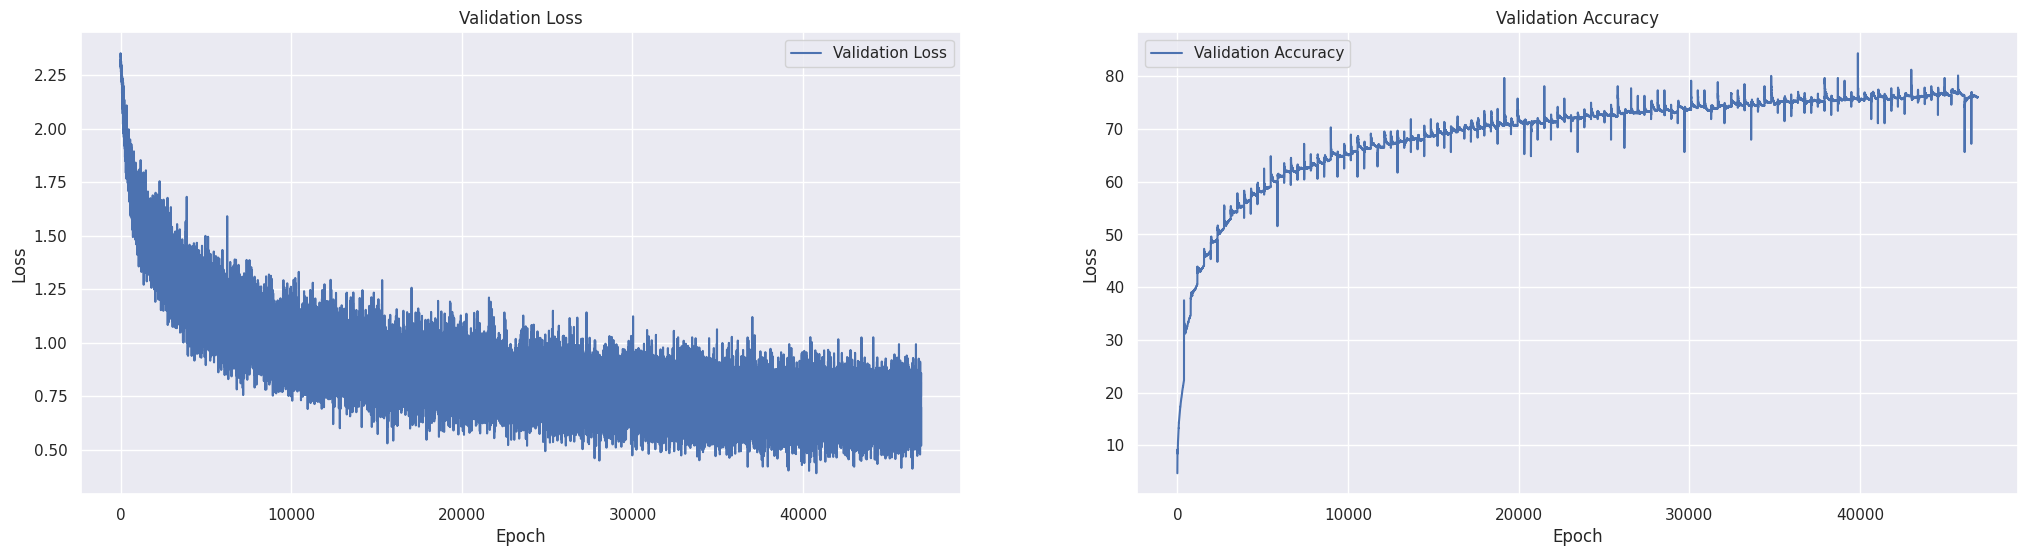

In [18]:
test_losses = [t.item() for t in test_losses]
plot_metrics([train_acc,train_losses, test_acc,test_losses])

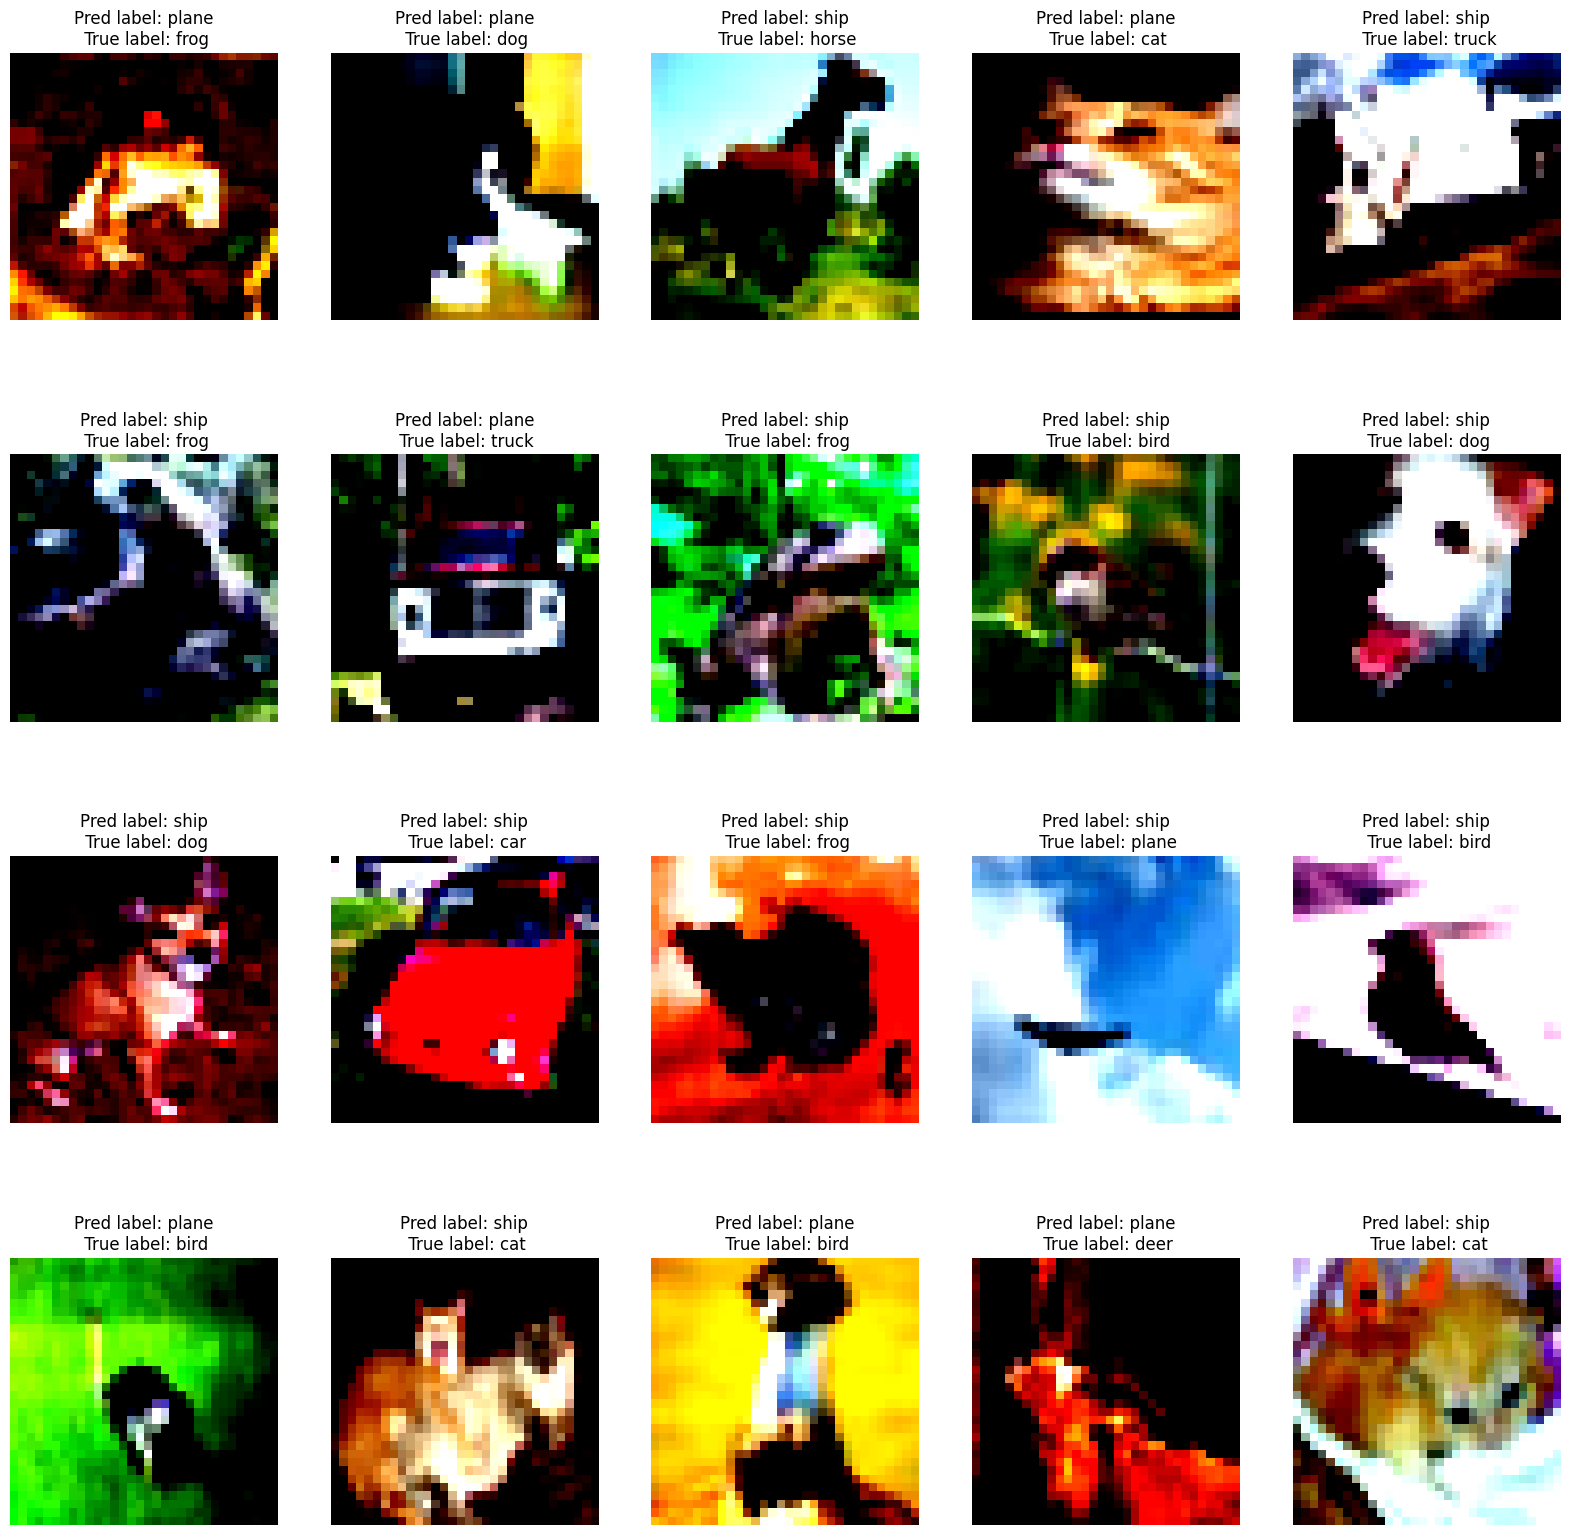

In [11]:
classes = ('0','1','2','3','4','5','6','7','8','9')
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


model = Net().to(device)
model.eval()

figure = plt.figure(figsize=(20, 20))
num_of_images = 20
index = 1

misclass_img_list = []
untrans_img=[]

with torch.no_grad():

    for data, target in testloader:
        data, target = data.to(
            device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        act = target.view_as(pred)
        # since most of the bool vec is true (good problem to have) and switch (flip) the true to false and vice versa
        bool_vec = ~pred.eq(act)

        # now extract the index number from the tensor which has 'true'
        idx = list(
            np.where(bool_vec.cpu().numpy())[0])

        if idx:  # if not a blank list
            idx_list = idx
            # print(data[idx_list[0]].shape)
            if index < num_of_images+1:
                plt.subplot(4, 5, index)
                plt.axis('off')
                a = classes[target[idx[0]].cpu().item()]
                p = classes[pred[idx[0]].cpu().item()]
                titl = f"Pred label: {p}\n True label: {a}" # title of plot
                # prints the 1st index of each batch.

                img = data[idx[0]].cpu()
                img = img.squeeze().numpy()
                untrans_img.append(img)
                img = np.transpose(img, (1, 2, 0))
                image = plt.imshow(img, cmap="gray") # showing the plot
                misclass_img_list.append(image)

                plt.title(titl)
                index += 1